In [1]:
# %load_ext nb_black
import numpy as np
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics as m
import xgboost as xgb
import seaborn as sns
warnings.filterwarnings("ignore")
random_seed = 8
import xgboost as xgb
import pickle

In [2]:
temp=['L100700', 'SEX', 'S000300', 'L103000', 'L103100', 'L103300',
       'S000501', 'S000100', 'L101300', 'L190300', 'L100500', 'L101700',
      
        'S000300', 'SEX', 'L103300', 'S000501', 
        'L103100', 'L101300', 'S000502', 'L190300', 'L190400', 'L100700', 'L103000', 'L100800',

        'L190900', 'L190700', 'L104500', 'L190800', 'L190600', 'L190400',
        'L190500', 'L104300', 'L104400', 'S000100', 'L100200',

        'L103300', 'L103100', 'L103000', 'L103200', 'S000300', 'L102900', 'SEX', 
        'L100700', 'L190300', 'L190400', 'L190500', 'L100500',

        'L504700', 'AGE','L101700', 'FIELD_4', 'L100800',
        'S000100', 'L103300', 'L101600', 'L100700', 'S000501', 'FIELD_38',

        'L190300', 'L190500', 'L190400', 'L103100', 'S000300',
        'L100700', 'L103300', 'S000100', 'L103000', 'S000501', 'S000502',

        'L103100', 'L103300', 'SEX', 'S000300', 'L103000', 'L190300', 
        'L100700', 'L190400', 'L190500', 'L100500', 'S000100', 'L101300',

        'L101700', 'SEX', 'L101300', 'FIELD_38', 'S000300', 'L101200', 
        'L100700', 'L190400', 'L103000', 'L103300', 'L190300', 'L100800',
      
       'L103000', 'L100700', 'L101700', 'S000300', 'S000502', 'FIELD_33',
       'L190000', 'L100800', 'L101600', 'S000501',

#         'L100800', 'L104600', 'SEX', 'AGE', 'L101300', 'S000300', 
#         'L103000', 'L103300', 'S000501', 'S000502', 'L101700', 'FIELD_38',
      
#       'L102900', 'L103000', 'L103200', 
      'FIELD_1','FIELD_2','FIELD_33','FIELD_15','CLASS'
     
     ]

In [3]:
# collected form each main diabetic indicator features regressors
cols = np.unique(temp)
print(cols)

['AGE' 'CLASS' 'FIELD_1' 'FIELD_15' 'FIELD_2' 'FIELD_33' 'FIELD_38'
 'FIELD_4' 'L100200' 'L100500' 'L100700' 'L100800' 'L101200' 'L101300'
 'L101600' 'L101700' 'L102900' 'L103000' 'L103100' 'L103200' 'L103300'
 'L104300' 'L104400' 'L104500' 'L190000' 'L190300' 'L190400' 'L190500'
 'L190600' 'L190700' 'L190800' 'L190900' 'L504700' 'S000100' 'S000300'
 'S000501' 'S000502' 'SEX']


In [4]:
xcols=[]
ycols=[]
allxycols=[]

for i in cols:
    xcols.append (i+'_x')
    ycols.append (i+'_y')
    
    allxycols.append (i+'_x')
    allxycols.append (i+'_y')

Read Dataset
====

In [7]:
newdata=pd.read_csv('../Dataset/DATASET_2019-10-24_light.txt')[['FIELD_1','FIELD_2','CLASS']]

In [8]:
x_original=pd.read_csv('../Dataset/_XLable_forischemic.txt').drop(columns=['CLASS'])
y_original=pd.read_csv('../Dataset/_TargetLable_forischemic.txt').drop(columns=['CLASS'])

In [9]:
x_original=pd.merge(x_original,newdata,how='inner', left_on=['FIELD_1','FIELD_2'], right_on=['FIELD_1','FIELD_2'])
x_original.shape

(193691, 409)

In [10]:
y_original=pd.merge(y_original,newdata,how='inner', left_on=['FIELD_1','FIELD_2'], right_on=['FIELD_1','FIELD_2'])
y_original.shape

(193691, 409)

In [11]:
data = pd.merge(
    x_original, y_original, how="inner", left_on="Unnamed: 0", right_on="Unnamed: 0"
)
data.shape

(193730, 817)

In [12]:
data.groupby('CLASS_y').size()

CLASS_y
0    192278
1      1452
dtype: int64

Prepare dataset
===

In [13]:
data = data[allxycols].dropna()
print(data.shape)

(64980, 76)


In [14]:
data.groupby('CLASS_y').size()

CLASS_y
0    64510
1      470
dtype: int64

In [15]:
maindata=data.copy()

class0=maindata[maindata.CLASS_y==0]
class1=maindata[maindata.CLASS_y==1]

class0=class0.sample(class1.shape[0],random_state=42)

data=pd.concat([class1,class0])

print(data.shape)

data.groupby(by='CLASS_y').size()

(940, 76)


CLASS_y
0    470
1    470
dtype: int64

In [16]:
excludedvalues=maindata.drop(data.index)#.sample(10000,random_state=42)
xtrain2=excludedvalues[xcols]
ytrain2=excludedvalues[ycols]
print(xtrain2.shape)

(64040, 38)


In [17]:
# x = data[xcols]
# y = data[ycols]

# xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=42, test_size=0.3)


In [18]:

test=pd.concat([data[data.CLASS_y==0].dropna().sample(100,random_state=42),
               data[data.CLASS_y==1].dropna().sample(100,random_state=42)])           
train=data.drop(test.index)

xtrain=train[xcols] 
xtest=test[xcols] 
ytrain=train[ycols]  
ytest=test[ycols] 


In [19]:
xtrain_original=xtrain.copy()
ytrain_original=ytrain.copy()

xtrain=pd.concat([xtrain,xtrain2])
ytrain=pd.concat([ytrain,ytrain2])

print(xtrain.shape,xtest.shape)

(64780, 38) (200, 38)


In [20]:
ytest.groupby(by='CLASS_y').size()

CLASS_y
0    100
1    100
dtype: int64

Train Regression Models
==========

L100700_x # Uric Acid
====

In [21]:
regr = xgb.XGBRegressor(colsample_bytree=0.4,objective='reg:squarederror',
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=100,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

regr.fit(xtrain,  ytrain[["L100700_y"]])

ypred = regr.predict(xtest)

print("r2_score", m.r2_score(ytest[["L100700_y"]], ypred))

r2_score 0.7935536218014777


In [23]:
pred_L100700 = ypred
with open('models/ISchemiaModel_nextyear_L100700_XGBRegressor', 'wb') as f:
    pickle.dump(regr, f) 

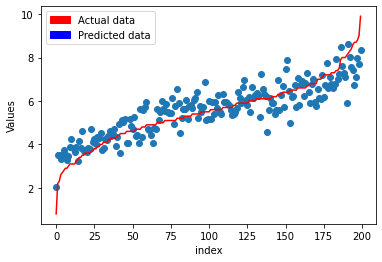

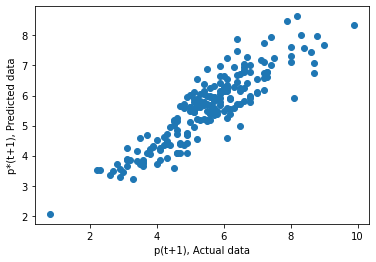

In [24]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

ypredPD=pd.DataFrame() 
ypredPD['t + 1']=ytest[["L100700_y"]].values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(30)

import matplotlib.patches as mpatches
plt.ylabel('Values')
plt.xlabel('index')
red_patch = mpatches.Patch(color='red', label='Actual data')
blue_patch = mpatches.Patch(color='blue', label='Predicted data')
plt.legend(handles=[red_patch,blue_patch])

ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])
plt.plot(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]],color='red')
plt.show()

plt.ylabel('p*(t+1), Predicted data')
plt.xlabel('p(t+1), Actual data')
plt.scatter(ypredPD['t + 1'][:ypredPD.shape[0]],ypredPD['pred (t +1)'][:ypredPD.shape[0]])

S000300 #BMI
===

In [25]:

regr = xgb.XGBRegressor(colsample_bytree=0.4,objective='reg:squarederror',
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=1000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

regr.fit(
    xtrain,
    ytrain[["S000300_y"]],
)


ypred = regr.predict(  xtest )

print("r2_score", m.r2_score(ytest[["S000300_y"]], ypred))

r2_score 0.9143400312384415


In [26]:
pred_S000300 = ypred
with open('models/ISchemiaModel_nextyear_S000300_XGBRegressor', 'wb') as f:
    pickle.dump(regr, f) 

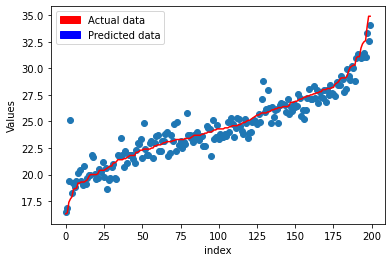

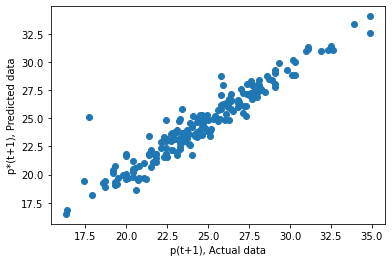

In [27]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

ypredPD=pd.DataFrame() 
ypredPD['t + 1']=ytest[["S000300_y"]].values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(30)

import matplotlib.patches as mpatches
plt.ylabel('Values')
plt.xlabel('index')
red_patch = mpatches.Patch(color='red', label='Actual data')
blue_patch = mpatches.Patch(color='blue', label='Predicted data')
plt.legend(handles=[red_patch,blue_patch])

ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])
plt.plot(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]],color='red')
plt.show()

plt.ylabel('p*(t+1), Predicted data')
plt.xlabel('p(t+1), Actual data')
plt.scatter(ypredPD['t + 1'][:ypredPD.shape[0]],ypredPD['pred (t +1)'][:ypredPD.shape[0]])

L101700 # r-GTP gamma
===

In [28]:
regr = xgb.XGBRegressor(colsample_bytree=0.4,objective='reg:squarederror',
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=1000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 
regr.fit(
    xtrain,
    ytrain[["L101700_y"]],
)

ypred = regr.predict(  xtest )

print("r2_score", m.r2_score(ytest[["L101700_y"]], ypred))

r2_score 0.7268757745289589


In [29]:
pred_L101700 = ypred
with open('models/ISchemiaModel_nextyear_L101700_XGBRegressor', 'wb') as f:
    pickle.dump(regr, f) 

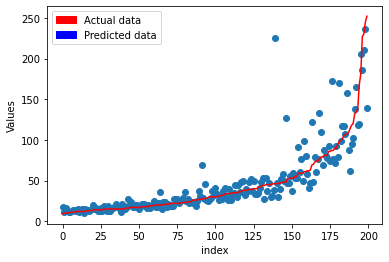

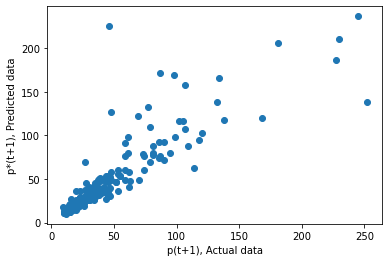

In [30]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

ypredPD=pd.DataFrame() 
ypredPD['t + 1']=ytest[["L101700_y"]].values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(30)

import matplotlib.patches as mpatches
plt.ylabel('Values')
plt.xlabel('index')
red_patch = mpatches.Patch(color='red', label='Actual data')
blue_patch = mpatches.Patch(color='blue', label='Predicted data')
plt.legend(handles=[red_patch,blue_patch])

ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])
plt.plot(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]],color='red')
plt.show()

plt.ylabel('p*(t+1), Predicted data')
plt.xlabel('p(t+1), Actual data')
plt.scatter(ypredPD['t + 1'][:ypredPD.shape[0]],ypredPD['pred (t +1)'][:ypredPD.shape[0]])

L1033 # Cardiac risk factor
=======

In [31]:
regr = xgb.XGBRegressor(colsample_bytree=0.4,objective='reg:squarederror',
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=100,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 
regr.fit(
    xtrain,
    ytrain[["L103300_y"]],
)


ypred = regr.predict(xtest)

print("r2_score", m.r2_score(ytest[["L103300_y"]], ypred))

r2_score 0.7232456079340086


In [32]:
pred_L103300 = ypred
with open('models/ISchemiaModel_nextyear_L103300_XGBRegressor', 'wb') as f:
    pickle.dump(regr, f) 

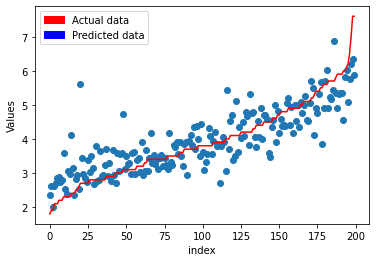

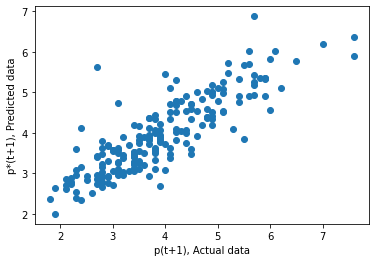

In [33]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

ypredPD=pd.DataFrame() 
ypredPD['t + 1']=ytest[["L103300_y"]].values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(30)

import matplotlib.patches as mpatches
plt.ylabel('Values')
plt.xlabel('index')
red_patch = mpatches.Patch(color='red', label='Actual data')
blue_patch = mpatches.Patch(color='blue', label='Predicted data')
plt.legend(handles=[red_patch,blue_patch])

ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])
plt.plot(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]],color='red')
plt.show()

plt.ylabel('p*(t+1), Predicted data')
plt.xlabel('p(t+1), Actual data')
plt.scatter(ypredPD['t + 1'][:ypredPD.shape[0]],ypredPD['pred (t +1)'][:ypredPD.shape[0]])

103100 # HDL
===

In [34]:
regr = xgb.XGBRegressor(colsample_bytree=0.4,objective='reg:squarederror',
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=30,
                 min_child_weight=1.5,
                 n_estimators=100,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 
regr.fit(
    xtrain,
    ytrain[["L103100_y"]],
)

ypred = regr.predict(
    xtest )

print("r2_score", m.r2_score(ytest[["L103100_y"]], ypred))

r2_score 0.6272365667802524


In [35]:
pred_L103100 = ypred
with open('models/ISchemiaModel_nextyear_L103100_XGBRegressor', 'wb') as f:
    pickle.dump(regr, f) 

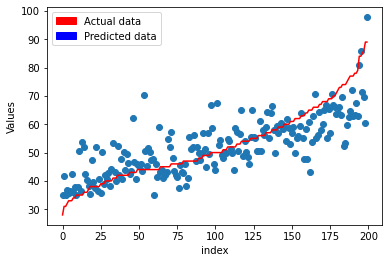

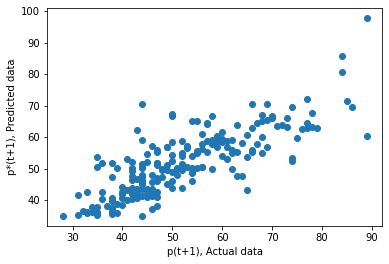

In [36]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

ypredPD=pd.DataFrame() 
ypredPD['t + 1']=ytest[["L103100_y"]].values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(30)

import matplotlib.patches as mpatches
plt.ylabel('Values')
plt.xlabel('index')
red_patch = mpatches.Patch(color='red', label='Actual data')
blue_patch = mpatches.Patch(color='blue', label='Predicted data')
plt.legend(handles=[red_patch,blue_patch])

ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])
plt.plot(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]],color='red')
plt.show()

plt.ylabel('p*(t+1), Predicted data')
plt.xlabel('p(t+1), Actual data')
plt.scatter(ypredPD['t + 1'][:ypredPD.shape[0]],ypredPD['pred (t +1)'][:ypredPD.shape[0]])

L190900 # 
====

In [37]:
regr = xgb.XGBRegressor(colsample_bytree=0.4,objective='reg:squarederror',
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=100,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 
regr.fit(
    xtrain,
    ytrain[["L190900_y"]],
)


ypred = regr.predict(
    xtest
)

print("r2_score", m.r2_score(ytest[["L190900_y"]], ypred))

r2_score 0.6734320672313479


In [38]:
pred_L190900 = ypred
with open('models/ISchemiaModel_nextyear_L190900_XGBRegressor', 'wb') as f:
    pickle.dump(regr, f) 

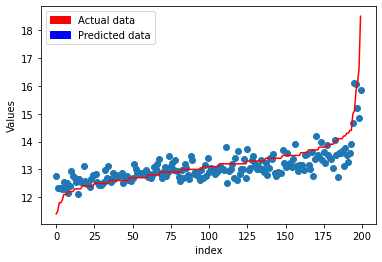

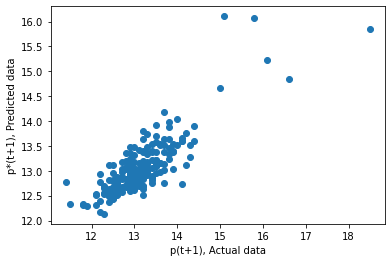

In [39]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

ypredPD=pd.DataFrame() 
ypredPD['t + 1']=ytest[["L190900_y"]].values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(30)

import matplotlib.patches as mpatches
plt.ylabel('Values')
plt.xlabel('index')
red_patch = mpatches.Patch(color='red', label='Actual data')
blue_patch = mpatches.Patch(color='blue', label='Predicted data')
plt.legend(handles=[red_patch,blue_patch])

ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])
plt.plot(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]],color='red')
plt.show()

plt.ylabel('p*(t+1), Predicted data')
plt.xlabel('p(t+1), Actual data')
plt.scatter(ypredPD['t + 1'][:ypredPD.shape[0]],ypredPD['pred (t +1)'][:ypredPD.shape[0]])

L504700 # 
====

In [40]:
regr = xgb.XGBRegressor(colsample_bytree=0.4,objective='reg:squarederror',
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=100,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 
regr.fit(
    xtrain,
    ytrain[["L504700_y"]],
)


ypred = regr.predict(xtest)

print("r2_score", m.r2_score(ytest[["L504700_y"]], ypred))


r2_score 0.8410774988078642


In [41]:
pred_L504700 = ypred
with open('models/ISchemiaModel_nextyear_L504700_XGBRegressor', 'wb') as f:
    pickle.dump(regr, f) 

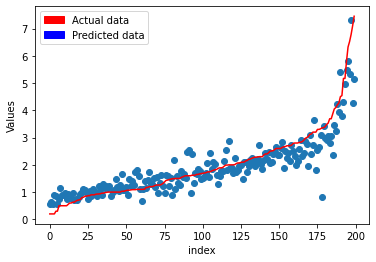

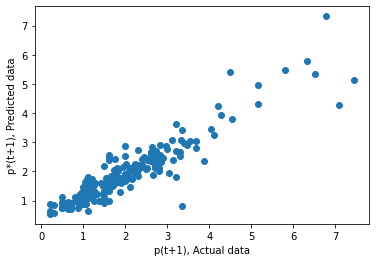

In [42]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

ypredPD=pd.DataFrame() 
ypredPD['t + 1']=ytest[["L504700_y"]].values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(30)

import matplotlib.patches as mpatches
plt.ylabel('Values')
plt.xlabel('index')
red_patch = mpatches.Patch(color='red', label='Actual data')
blue_patch = mpatches.Patch(color='blue', label='Predicted data')
plt.legend(handles=[red_patch,blue_patch])

ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])
plt.plot(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]],color='red')
plt.show()

plt.ylabel('p*(t+1), Predicted data')
plt.xlabel('p(t+1), Actual data')
plt.scatter(ypredPD['t + 1'][:ypredPD.shape[0]],ypredPD['pred (t +1)'][:ypredPD.shape[0]])

RBC #
===

In [43]:
regr = xgb.XGBRegressor(colsample_bytree=0.4,objective='reg:squarederror',
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=100,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 
regr.fit(
    xtrain,
    ytrain[["L190300_y"]],
)


ypred = regr.predict( xtest )

print("r2_score", m.r2_score(ytest[["L190300_y"]], ypred))


r2_score 0.7221641150827856


In [44]:
pred_L190300 = ypred
with open('models/ISchemiaModel_nextyear_L190300_XGBRegressor', 'wb') as f:
    pickle.dump(regr, f) 

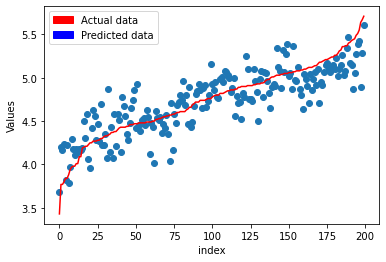

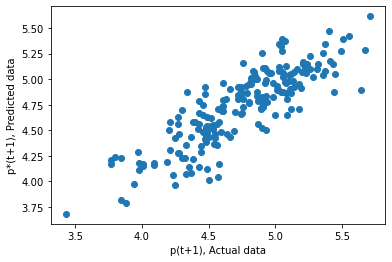

In [45]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

ypredPD=pd.DataFrame() 
ypredPD['t + 1']=ytest[["L190300_y"]].values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(30)

import matplotlib.patches as mpatches
plt.ylabel('Values')
plt.xlabel('index')
red_patch = mpatches.Patch(color='red', label='Actual data')
blue_patch = mpatches.Patch(color='blue', label='Predicted data')
plt.legend(handles=[red_patch,blue_patch])

ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])
plt.plot(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]],color='red')
plt.show()

plt.ylabel('p*(t+1), Predicted data')
plt.xlabel('p(t+1), Actual data')
plt.scatter(ypredPD['t + 1'][:ypredPD.shape[0]],ypredPD['pred (t +1)'][:ypredPD.shape[0]])

Triglycerides #
===

In [46]:
regr = xgb.XGBRegressor(colsample_bytree=0.4,objective='reg:squarederror',
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=60,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 
regr.fit(
    xtrain,
    ytrain[["L103000_y"]],
)


ypred = regr.predict(  xtest )

print("r2_score", m.r2_score(ytest[["L103000_y"]], ypred))


r2_score 0.4949264621440961


In [47]:
pred_L103000_y = ypred
with open('models/ISchemiaModel_nextyear_L103000_XGBRegressor', 'wb') as f:
    pickle.dump(regr, f) 

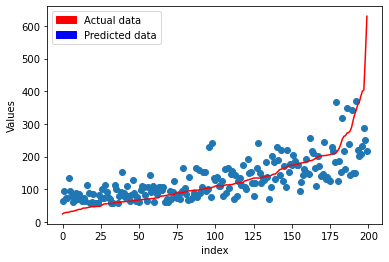

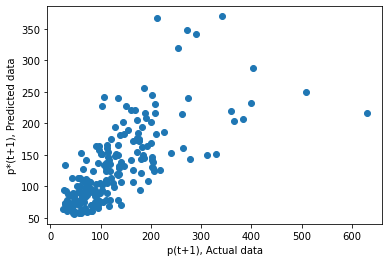

In [48]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

ypredPD=pd.DataFrame() 
ypredPD['t + 1']=ytest[["L103000_y"]].values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(30)

import matplotlib.patches as mpatches
plt.ylabel('Values')
plt.xlabel('index')
red_patch = mpatches.Patch(color='red', label='Actual data')
blue_patch = mpatches.Patch(color='blue', label='Predicted data')
plt.legend(handles=[red_patch,blue_patch])

ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])
plt.plot(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]],color='red')
plt.show()

plt.ylabel('p*(t+1), Predicted data')
plt.xlabel('p(t+1), Actual data')
plt.scatter(ypredPD['t + 1'][:ypredPD.shape[0]],ypredPD['pred (t +1)'][:ypredPD.shape[0]])

In [49]:
ytest.groupby(by='CLASS_y').size()

CLASS_y
0    100
1    100
dtype: int64

In [50]:
xtrain=xtrain_original
ytrain=ytrain_original

Categorical values
=====

In [51]:
pred_FIELD_15 = ytest.FIELD_15_y

In [52]:
pred_FIELD_38 = ytest.FIELD_38_y

In [53]:
pred_FIELD_33 = ytest.FIELD_33_y

In [54]:
pred_SEX = ytest.SEX_y

In [55]:
pred_AGE = ytest.AGE_y + 1

Combine the predicted values to make dataframe
====

In [56]:
NextYearData = pd.DataFrame()
NextYearData["P_FIELD_1"] = ytest.FIELD_1_y.values
NextYearData["P_FIELD_2"] = ytest.FIELD_2_y.values

NextYearData["P_L100700"] = pred_L100700
NextYearData["P_S000300"] = pred_S000300
NextYearData["P_L101700"] = pred_L101700
NextYearData["P_L103300"] = pred_L103300
NextYearData["P_L103100"] = pred_L103100
NextYearData["P_L190900"] = pred_L190900
NextYearData["P_L504700"] = pred_L504700
NextYearData["P_L190300"] = pred_L190300
NextYearData["P_L103000"] = pred_L103000_y

NextYearData["P_FIELD_15"] = pred_FIELD_15.values
NextYearData["P_FIELD_38"] = pred_FIELD_38.values
NextYearData["P_FIELD_33"] = pred_FIELD_33.values

NextYearData["P_SEX"] = pred_SEX.values
NextYearData["P_AGE"] = pred_AGE.values

NextYearData["CLASS"] = ytest.CLASS_y.values

In [57]:
NextYearData.to_csv("Predicted_NextYearData.txt", sep=",")

==============================================
==========

In [58]:
# select the actual next year values

NextYearData_actualData = pd.DataFrame()
NextYearData_actualData["FIELD_1"] = ytest.FIELD_1_y.values
NextYearData_actualData["FIELD_2"] = ytest.FIELD_2_y.values

NextYearData_actualData["L100700"] = ytest.L100700_y.values
NextYearData_actualData["S000300"] = ytest.S000300_y.values
NextYearData_actualData["L101700"] = ytest.L101700_y.values
NextYearData_actualData["L103300"] = ytest.L103300_y.values
NextYearData_actualData["L103100"] = ytest.L103100_y.values 
NextYearData_actualData["L190900"] = ytest.L190900_y.values 
NextYearData_actualData["L504700"] = ytest.L504700_y.values
NextYearData_actualData["L190300"] = ytest.L190300_y.values 
NextYearData_actualData["L103000"] = ytest.L103000_y.values

NextYearData_actualData["FIELD_15"] = ytest.FIELD_15_y.values
NextYearData_actualData["FIELD_38"] = ytest.FIELD_38_y.values
NextYearData_actualData["FIELD_33"] = ytest.FIELD_33_y.values
NextYearData_actualData["SEX"] = ytest.SEX_y.values
NextYearData_actualData["AGE"] = ytest.AGE_y.values

NextYearData_actualData["CLASS"] = ytest.CLASS_y.values


NextYearData_actualData.to_csv("NextYearData_actualData_test.txt", sep=",")

==========================================================
===

In [59]:
# select the actual this year values

ThisYearData_actualData = pd.DataFrame()
ThisYearData_actualData["FIELD_1"] = xtest.FIELD_1_x.values
ThisYearData_actualData["FIELD_2"] = xtest.FIELD_2_x.values

ThisYearData_actualData["L100700"] = xtest.L100700_x.values
ThisYearData_actualData["S000300"] = xtest.S000300_x.values
ThisYearData_actualData["L101700"] = xtest.L101700_x.values
ThisYearData_actualData["L103300"] = xtest.L103300_x.values
ThisYearData_actualData["L103100"] = xtest.L103100_x.values
ThisYearData_actualData["L190900"] = xtest.L190900_x.values
ThisYearData_actualData["L504700"] = xtest.L504700_x.values
ThisYearData_actualData["L190300"] = xtest.L190300_x.values
ThisYearData_actualData["L103000"] = xtest.L103000_x.values

ThisYearData_actualData["FIELD_15"] = xtest.FIELD_15_x.values
ThisYearData_actualData["FIELD_38"] = xtest.FIELD_38_x.values
ThisYearData_actualData["FIELD_33"] = xtest.FIELD_33_x.values

ThisYearData_actualData["SEX"] = xtest.SEX_x.values
ThisYearData_actualData["AGE"] = xtest.AGE_x.values 

ThisYearData_actualData["CLASS"] = xtest.CLASS_x.values 

ThisYearData_actualData.to_csv("ThisYearData_actualData_test.txt", sep=",")

============================================
=========

In [60]:
# select the actual next year values train

NextYearData_actualData_train = pd.DataFrame()
NextYearData_actualData_train["FIELD_1"] = ytrain.FIELD_1_y.values
NextYearData_actualData_train["FIELD_2"] = ytrain.FIELD_2_y.values

NextYearData_actualData_train["L100700"] = ytrain.L100700_y.values
NextYearData_actualData_train["S000300"] = ytrain.S000300_y.values
NextYearData_actualData_train["L101700"] = ytrain.L101700_y.values
NextYearData_actualData_train["L103300"] = ytrain.L103300_y.values
NextYearData_actualData_train["L103100"] = ytrain.L103100_y.values 
NextYearData_actualData_train["L190900"] = ytrain.L190900_y.values 
NextYearData_actualData_train["L504700"] = ytrain.L504700_y.values
NextYearData_actualData_train["L190300"] = ytrain.L190300_y.values 
NextYearData_actualData_train["L103000"] = ytrain.L103000_y.values


NextYearData_actualData_train["FIELD_15"] = ytrain.FIELD_15_y.values
NextYearData_actualData_train["FIELD_38"] = ytrain.FIELD_38_y.values
NextYearData_actualData_train["FIELD_33"] = ytrain.FIELD_33_y.values

NextYearData_actualData_train["SEX"] = ytrain.SEX_y.values
NextYearData_actualData_train["AGE"] = ytrain.AGE_y.values


NextYearData_actualData_train["CLASS"] = ytrain.CLASS_y.values


NextYearData_actualData_train.to_csv("NextYearData_actualData_train.txt", sep=",")

=================================================
==============

In [61]:
# select the actual this year values train

ThisYearData_actualData_train = pd.DataFrame()
ThisYearData_actualData_train["FIELD_1"] = xtrain.FIELD_1_x.values
ThisYearData_actualData_train["FIELD_2"] = xtrain.FIELD_2_x.values

ThisYearData_actualData_train["L100700"] = xtrain.L100700_x.values
ThisYearData_actualData_train["S000300"] = xtrain.S000300_x.values
ThisYearData_actualData_train["L101700"] = xtrain.L101700_x.values
ThisYearData_actualData_train["L103300"] = xtrain.L103300_x.values
ThisYearData_actualData_train["L103100"] = xtrain.L103100_x.values
ThisYearData_actualData_train["L190900"] = xtrain.L190900_x.values
ThisYearData_actualData_train["L504700"] = xtrain.L504700_x.values
ThisYearData_actualData_train["L190300"] = xtrain.L190300_x.values
ThisYearData_actualData_train["L103000"] = xtrain.L103000_x.values


ThisYearData_actualData_train["FIELD_15"] = xtrain.FIELD_15_x.values
ThisYearData_actualData_train["FIELD_38"] = xtrain.FIELD_38_x.values
ThisYearData_actualData_train["FIELD_33"] = xtrain.FIELD_33_x.values

ThisYearData_actualData_train["SEX"] = xtrain.SEX_x.values
ThisYearData_actualData_train["AGE"] = xtrain.AGE_x.values

ThisYearData_actualData_train["CLASS"] = xtrain.CLASS_x.values

ThisYearData_actualData_train.to_csv("ThisYearData_actualData_train.txt", sep=",")